<a href="https://colab.research.google.com/github/dss5201-2410/Notebooks/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with time series

`Pandas` contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Data and time data come in a few flavors, including the following:

+ Time stamps reference particular moments in time (e.g., March 26, 2024 at 10pm).

+ Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2023. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).

+ Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

We will introduce how to work with each of these types of date/time data in Pandas.

## Date and time in Python

The Python world has a number of available representations of dates, times, deltas, and timespans. While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

Python's basic objects for working with dates and times reside in the built-in `datetime` module. Along with the third-party `dateutil` module, you can use it to quickly perform a host of useful functionalities on dates and times.

For example, you can manually build a date using the datetime type:

In [12]:
from datetime import datetime
datetime(year = 2024, month = 3, day = 26)

datetime.datetime(2024, 3, 26, 0, 0)

Or, using the `dateutil` module, you can parse dates from a variety of string formats:

In [ ]:
from dateutil import parser
date = parser.parse("26th of March, 2024")
date

datetime.datetime(2024, 3, 26, 0, 0)

Once you have a `datetime` object, you can do things like printing the day of the week.

You can read more about the [strftime section in Python's datetime documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [ ]:
date.strftime('%A')

'Tuesday'

The power of `datetime` and `dateutil` lie in their flexibility and easy syntax: You can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.

Where they break down is when you wish to work with large arrays of dates and times: Just as lists of Python numerical variables are sub-optimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are sub-optimal compared to typed arrays of encoded dates.

## `Numpy`'s `datetime64` type

The weaknesses of Python's datetime format inspired the `NumPy` team to add a set of native time series data type to `NumPy`. The `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The `datetime64` requires a very specific input format:

In [4]:
import numpy as np
date1 = np.datetime64('2024-03-26')
date1

numpy.datetime64('2024-03-26')

Once we have this date formatted, we can quickly do vectorized operations on it:

In [ ]:
date1 + np.arange(12)

array(['2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29',
       '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
       '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06'],
      dtype='datetime64[D]')

## Dates and times in `pandas`

`Pandas` builds upon the `numpy`'s method and provides a `Timestamp` object.

We can use `pandas` to repeat the demonstration above. In fact, we can parse a flexibly formatted string date, and use format codes to output the days of the week.

In [1]:
import pandas as pd
date2 = pd.to_datetime("26th of March, 2024")
date2

Timestamp('2024-03-26 00:00:00')

In [2]:
date2.strftime("%A")

'Tuesday'

In [6]:
date2 + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29',
               '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
               '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06'],
              dtype='datetime64[ns]', freq=None)

When the `pandas` time series tools become really useful is when we begin to **index date by timestamps**. For example, we can construct a series object that has time-indexed data:

In [10]:
index = pd.DatetimeIndex(["2024-07-24", "2024-08-24", "2025-01-01"])
date3 = pd.Series([0, 1, 2], index = index)
date3

2024-07-24    0
2024-08-24    1
2025-01-01    2
dtype: int64

We can make use of the series indexing patterns to pass a value to obtain a slice of all data from that index:

In [9]:
date3["2024"]

2024-07-24    0
2024-08-24    1
dtype: int64

Here are the fundamental `pandas` data structures for time series data:

+ For time stamps, `pandas` provides the `Timestamp` type. It is the same as `python`'s native `datetime`, but based on a more efficient `numpy.datetime64` data type. The associated index structure is `DatetimeIndex`.

+ For time periods, `pandas` provides the `Period` type, which encodes a fixed-frequency interval based on `numpy.datetime64`. The associated index sturcture is `PeriodIndex`.

+ For time deltas or durations, `pandas` provides the `Timedelta` type, which is a more efficient replacement for `python`'s native `datetime.timedelta` type and based on `numpy.timedelta64`. The associated index structure is `TimedeltaIndex`.



The most fundamental of these objects are the `Timestamp` and `DatetimeIndex` objects. They can be created using the `pd.to_datetime()` function. The function accepts a wide variety of formats.

In [13]:
date4 = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
date4

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any `DatetimeIndex` can be converted to a `PeriodIndex` with the `to_period()` function. The function also requires a frequency code. For example, we use `"D"` to indicate daily frequency.

In [14]:
date4.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

A `TimedeltaIndex` is created when a date is subtracted from another.

In [15]:
date4 - date4[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences: `pd.date_range()`

To make the creation of regular date sequences more convenient, `pandas` offers a few functions:

+ `pd.date_range()` for timestamps.

+ `pd.period_range()` for periods.

+ `pd.timedelta_range()` for time deltas.

`pd.date_range()` accepts a start day, an end day, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day.

In [17]:
pd.date_range("2024-03-27", "2024-04-09")

DatetimeIndex(['2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07',
               '2024-04-08', '2024-04-09'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified with a start point and a number of periods.

In [18]:
pd.date_range("2024-03-27", periods = 8)

DatetimeIndex(['2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the `freq` argument, which defaults to be one day (`"D"`). We can also construct a range of hourly timestamps.

In [19]:
pd.date_range("2024-03-27", periods = 8, freq = "H")

DatetimeIndex(['2024-03-27 00:00:00', '2024-03-27 01:00:00',
               '2024-03-27 02:00:00', '2024-03-27 03:00:00',
               '2024-03-27 04:00:00', '2024-03-27 05:00:00',
               '2024-03-27 06:00:00', '2024-03-27 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of `Period ` or `Timedelta` values, we use the `pd.period_range()` and `pd.timedelta_range()` functions. The syntax are very similar.

In [20]:
pd.period_range("2024-03", periods = 8, freq = "M")  # Monthly periods

PeriodIndex(['2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
             '2024-09', '2024-10'],
            dtype='period[M]')

In [22]:
pd.timedelta_range(0, periods = 8, freq = "H") # Durations increasing by an hour

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00'],
               dtype='timedelta64[ns]', freq='H')

## `Pandas` frequency codes

Fundamental to these `pandas` time series tools is the concept of a frequency of date offset.

We saw the `M` (month), `D` (day), and `H` (hour) codes above. The following table summarizes the main codes available:

```
D Calendar day    B Business day
W weekly          
M Month end       BM Business month end
Q Quarter end     BQ Business quarter end
A Year end        BA Business year end
H Hours           BH Business hours
T Minutes
S Seconds
L Milliseconds
U Microseconds
N Nanoseconds
```

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By putting an `S` suffix to any of these, they instead will be marked at the beginning.

```         
MS Month start       BMS Business month start
QS Quarter start     BQS Business quarter start
AS Year start        BAS Business year start
```

Additionally, we can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

```         
Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc
A-JAN, BA-FEB, AS-MAR, BAS-APR, etc
```

In the same way, the split-point of the weekly frequency can also be modified by adding a three-letter weekday code:

```         
W-SUN, WMON, W-TUE, W-WED, etc
```

On top of these, codes can be combined with numebrs to specified other frequencies. For example, for a frequency of 2 hours 3o minutes, we can combine the hour ("`H`") and minute ("`T`") code as follows:

In [23]:
pd.timedelta_range(0, periods = 8, freq = "2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of `pandas` time series offsets, which can be found in the `pd.tseries.offsets` module. For example, we can create a business day offset directly as follows:

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range("2024-03-27", periods = 8, freq = BDay())

DatetimeIndex(['2024-03-27', '2024-03-28', '2024-03-29', '2024-04-01',
               '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05'],
              dtype='datetime64[ns]', freq='B')

## Resampling, shifting, and windowing

The ability to use dates and times as indices to intuitively organize and access data is an important `pandas` time series tools. The benefits of indexed data still apply (automatic alignment, intuitive data slicing and data access, etc), and `pandas` provides several additional times series specific operations.

We will take a look at a few here, using stock price data as an example.

We can use the [`yfinance` package](https://pypi.org/project/yfinance/) to download financial market data from Yahoo! Finance.

In [62]:
import yfinance as yf
data = yf.download('TSLA', start = '2020-01-01', end='2024-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


For simplicity, we will use the closing price (`Close`).

We will then visualize it using the `plot()` method.

In [63]:
data = data["Close"]

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

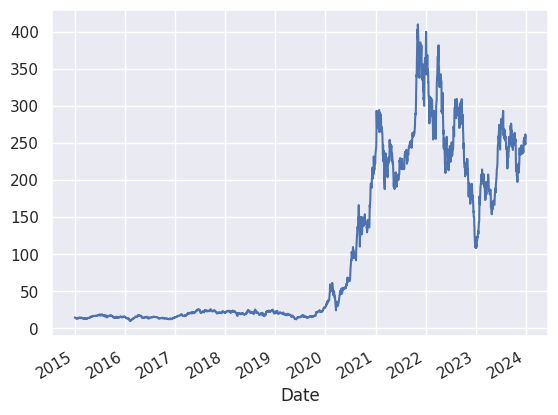

In [64]:
data.plot();

One common need for high-frequency time series data is **resampling** at a hiugher or lower frequency. This can be done using the `resample()` method, or the `asfreq()` method. The primary difference between the two is that the former is fundamentally a data aggregation, while the latter is a a data selection.

Let's compare what the two functions return when we down-sample the data. Here we will resample the data at the end of business year.

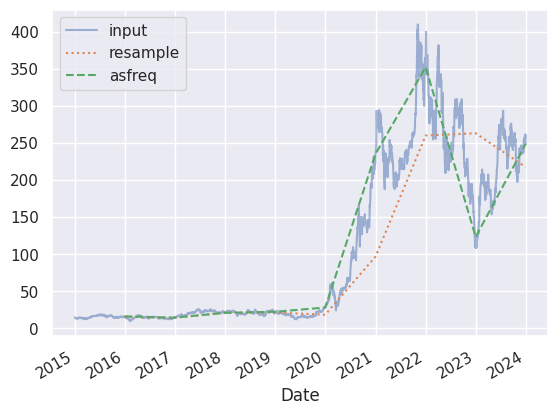

In [65]:
data.plot(alpha = 0.5, style = "-")
data.resample("BA").mean().plot(style = ":")
data.asfreq("BA").plot(style = "--");
plt.legend(["input", "resample", "asfreq"], loc = "upper left");

The "`BA`" argument stands for end of business year.

Notice the difference: At each plot, `resample()` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

For **up-sampling**, `resample()` and `asfreq()` are largely equivalent, though the former has many more options available. The default for both methods is to leave the up-sampled points empty (filled with `NaN`s). `asfreq()` accepts a `method = ` argument to specify how the values are imputed.

Here, we will resample the business day data at a daily frequency (including weekends).



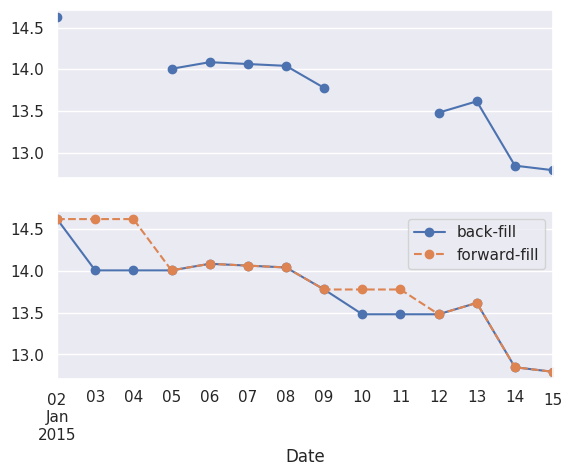

In [70]:
fig, ax = plt.subplots(2, sharex = True)
data1 = data.iloc[:10]
data1.asfreq("D").plot(ax = ax[0], marker = "o")
data1.asfreq("D", method = "bfill").plot(ax = ax[1], style = "-o")
data1.asfreq("D", method = "ffill").plot(ax = ax[1], style = "--o")
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: Non-business days are left as `NaN` values and do not appear on the plot. The bottom panel shows the differences between backward anf forward fills.

## Time shifts

Another comon time series specific specification is shifting the data in time. `Pandas` has two closely related methods for this: `shift()` and `tshift()`. In short, the difference between them is that `shift()` shifts the data, while `tshift()` shifts the index.

<ipython-input-73-73edda139faa>:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data2.tshift(900).plot(ax = ax[2])


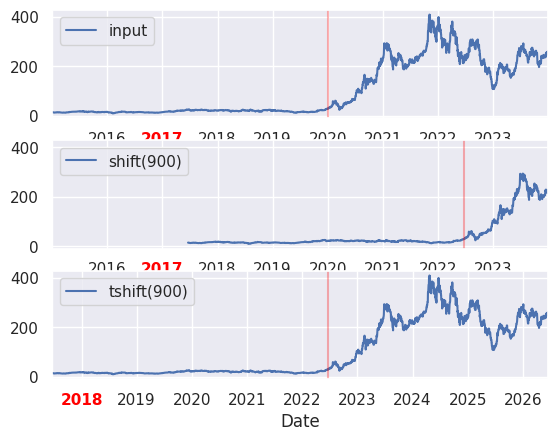

In [73]:
fig, ax = plt.subplots(3, sharey = True)
data2 = data.asfreq("D", method = "pad")
data2.plot(ax = ax[0])
data2.shift(900).plot(ax = ax[1])
data2.tshift(900).plot(ax = ax[2])

# legends and annotations
local_max = pd.to_datetime('2020-01-01')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

`shift(900`) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving `NaN` values at the other end). `tshift(900)` shifts the index values by 900 days.

A common context for this type of shifts is in computing differences over time.

For example, we can use shifted values to compute the one-year return on investment for the stock.



<ipython-input-75-a7ebe15ce1da>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (data2.tshift(-365) - data2 - 1)


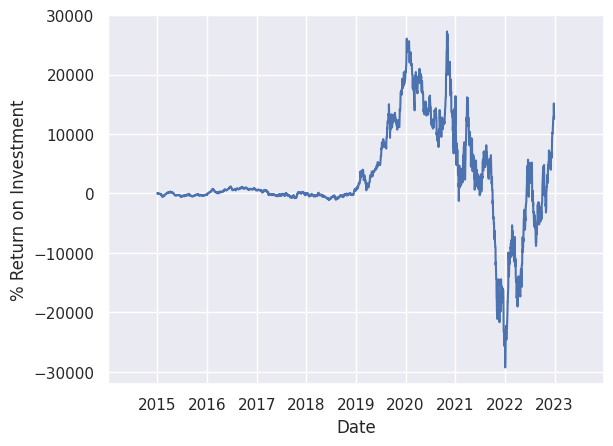

In [75]:
ROI = 100 * (data2.tshift(-365) - data2 - 1)
ROI.plot()
plt.ylabel("% Return on Investment");

This helps us see the overall trend in the stock. So far, the most profitable times to invest in the stock have been (unsurprisingly, in retrospect) shortly after 2019 and in the middle of the Covid-19 Pandemic.

## Rolling windows

Rolling statistics are a third type of time series specific operation implemented by `pandas`. These can be accomplished via `rolling()`. The rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the stock prices:

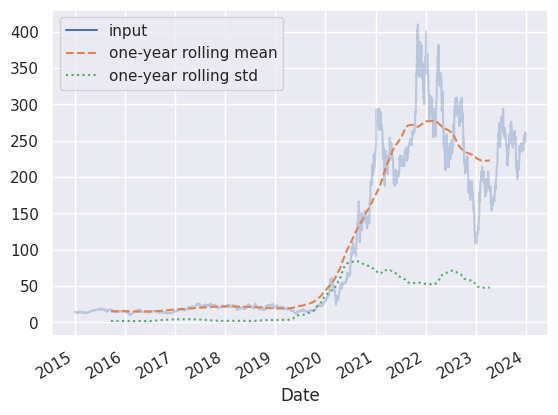

In [77]:
rolling = data.rolling(365, center = True)
data3 = pd.DataFrame({"input": data,
                    "one-year rolling mean": rolling.mean(),
                    "one-year rolling std": rolling.std()})
ax = data3.plot(style = ["-", "--", ":"])
ax.lines[0].set_alpha(0.3)

# Case Study: Seattle Bicycle Counts

Let's take a look at bicycle counts on Seattle's Fremont Bridge. The data come from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from https://data.seattle.gov/. Here is a [direct link](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/data_preview) to download the data.

In the following, we will read it in from Google Drive.

In [84]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/My Drive/DSS5202/wk7_SFbicycles.csv", index_col = "Date", parse_dates = True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


For convenience, we will further process this data set by shorterning the column names.

In [85]:
df.columns = ["Total", "West", "East"]

Now let's take a look at the summary statistics of the data/

In [86]:
df.dropna().describe()

,Total,West,East
count,99992.000000,99992.000000,99992.000000
mean,105.455626,45.645252,59.810375
std,132.011401,60.219737,81.663231
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,143.000000,62.000000,78.000000
max,1097.000000,667.000000,850.000000


We can gain some insight into the data set by visualizing it. Let's start by plotting the raw data.

In [87]:
%matplotlib inline
import seaborn; seaborn.set()

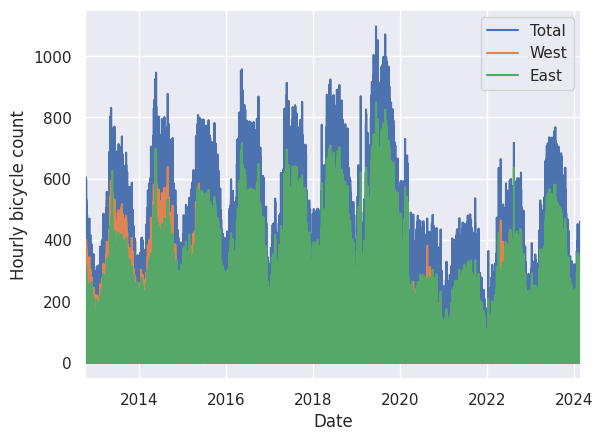

In [88]:
df.plot()
plt.ylabel("Hourly bicycle count");

The data are far too dense for us to make sense of. We can resample the data to a coarser grid. Let's resample it by week.

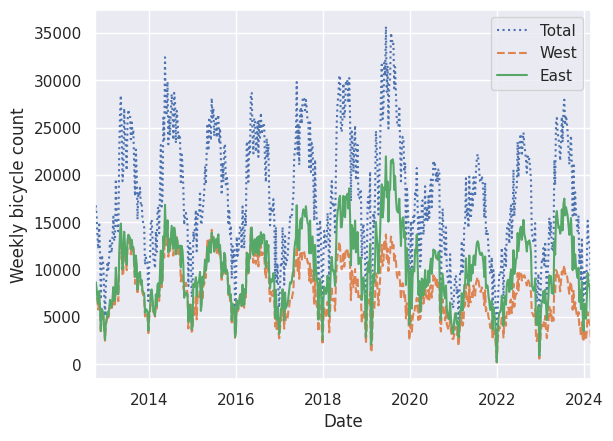

In [89]:
df_weekly = df.resample("W").sum()
df_weekly.plot(style = [":", "--", "-"])
plt.ylabel("Weekly bicycle count");

This shows some interesting seasonal trends. People bike more in the summer than in the winter, and even within a particular season, the bicycle use varies from week to week.

Another way that comes handy for aggregating the data is to use a rolling mean, with the `pd.rolling_mean()` function. Here we will do a 30-day rolling mean for our data, making sure ito center the window:

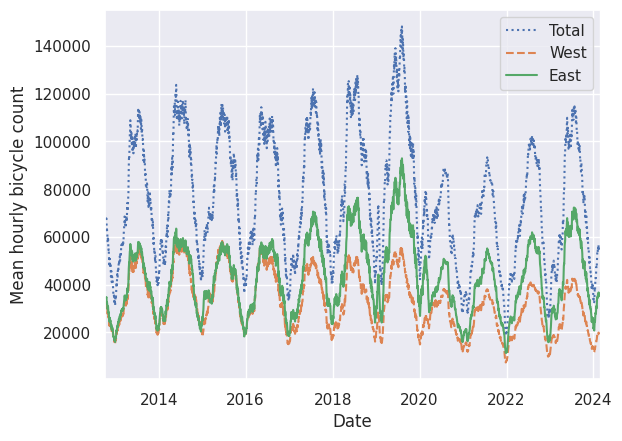

In [90]:
df_daily = df.resample("D").sum()
df_daily.rolling(30, center = True).sum().plot(style = [":", "--", "-"])
plt.ylabel("Mean hourly bicycle count");

We can get a smoother version of a rolling mean using a window function -- for example, a Gaussian window. The following code specifies both the width of the window (50 days) and the width of the Gaussian within the window (10 days).

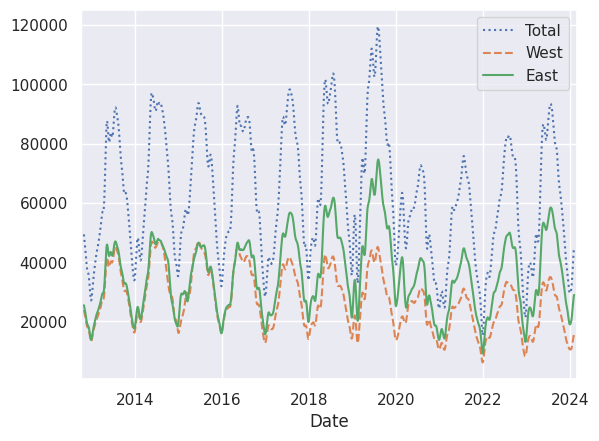

In [91]:
df_daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style = [':', '--', '-']);

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a funciton of the time of day.

We can do this with `groupby()`.

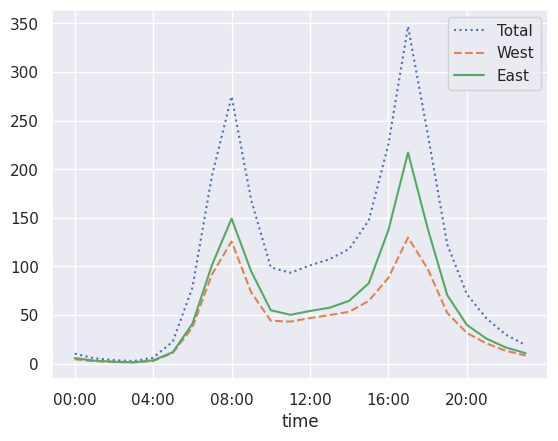

In [92]:
df_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
df_time.plot(xticks = hourly_ticks, style = [':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple `groupby`:

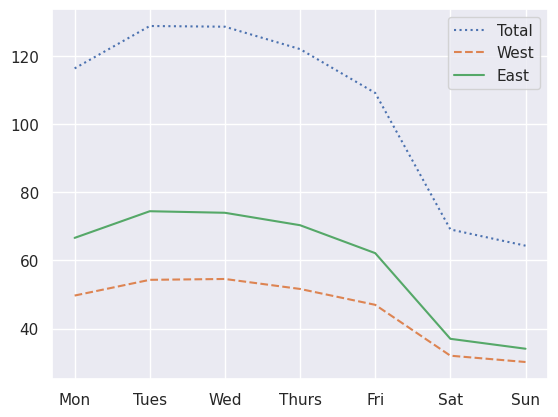

In [94]:
df_weekday = df.groupby(df.index.dayofweek).mean()
df_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday.plot(style = [':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound `groupby` and look at the hourly trend on weekdays versus weekends. We'll start by grouping by both a flag marking the weekend, and the time of day:

In [97]:
df_weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
df_time = df.groupby([df_weekend, df.index.time]).mean()

Total        West        East
Weekday 00:00:00    8.306116    3.623992    4.682124
        01:00:00    4.151210    1.851142    2.300067
        02:00:00    2.796371    1.195228    1.601142
        03:00:00    2.389113    1.172715    1.216398
        04:00:00    7.193884    3.299731    3.894153
        05:00:00   28.986559   14.025202   14.961358
        06:00:00  102.597782   48.972446   53.625336
        07:00:00  257.813844  122.793683  135.020161
        08:00:00  361.134409  164.879032  196.255376
        09:00:00  202.020504   86.786218  115.234286
        10:00:00   96.262521   41.997311   54.265210
        11:00:00   78.668347   36.086358   42.581989
        12:00:00   83.503024   38.421035   45.081989
        13:00:00   89.329526   40.973799   48.355727
        14:00:00  102.053392   44.696776   57.356615
        15:00:00  144.589322   61.126595   83.462727
        16:00:00  259.814305   97.244124  162.570181
        17:00:00  439.738079  160.190060  279.548019
        18:00:00  296.516454  120.242445  176.274009
        19:00:00  146.515782   61.743452   84.772330
        20:00:00   83.014439   36.440564   46.573875
        21:00:00   52.059100   23.570517   28.488583
        22:00:00   32.757220   14.372398   18.384822
        23:00:00   20.138684    8.810947   11.327737
Weekend 00:00:00   14.957143    6.651261    8.305882
        01:00:00    8.735294    4.003361    4.731933
        02:00:00    5.624258    2.612383    3.011874
        03:00:00    3.164706    1.327731    1.836975
        04:00:00    3.474790    1.413445    2.061345
        05:00:00    6.872269    3.169748    3.702521
        06:00:00   16.628571    7.445378    9.183193
        07:00:00   31.858824   14.523529   17.335294
        08:00:00   59.247899   27.675630   31.572269
        09:00:00   83.828571   39.659664   44.168908
        10:00:00  106.068067   49.450420   56.617647
        11:00:00  130.482353   61.181513   69.300840
        12:00:00  144.886555   67.863025   77.023529
        13:00:00  152.812605   72.377311   80.435294
        14:00:00  157.938655   74.996639   82.942017
        15:00:00  154.242017   73.273109   80.968908
        16:00:00  140.496639   66.178992   74.317647
        17:00:00  114.644538   53.573950   61.070588
        18:00:00   87.877311   40.985714   46.891597
        19:00:00   62.999160   28.269748   34.729412
        20:00:00   42.606723   19.491597   23.115126
        21:00:00   32.463866   13.799160   18.664706
        22:00:00   21.947899   10.015126   11.932773
        23:00:00   16.512605    7.205042    9.307563

Now we'll use some of the `matplotlib` tools to plot two panels side by side:

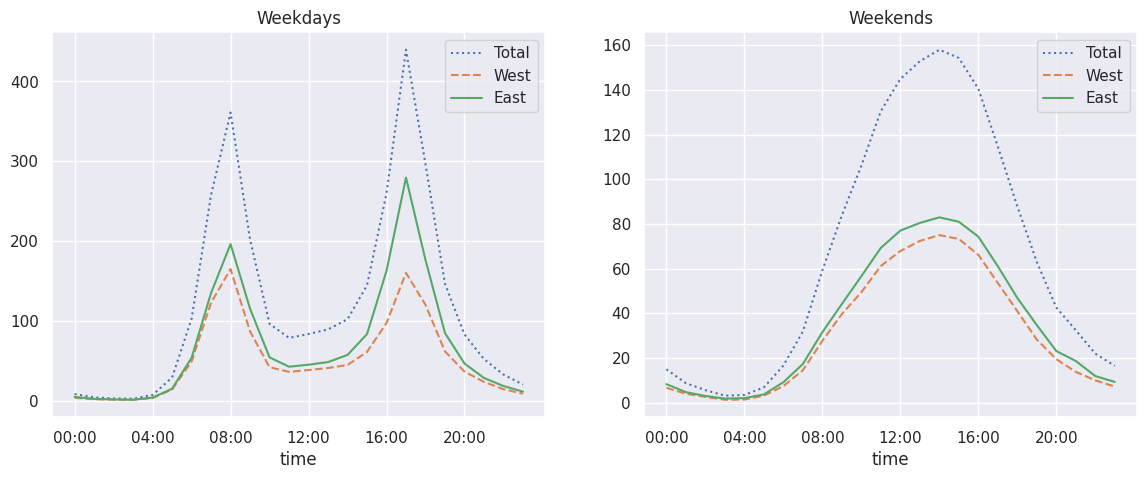

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
df_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: We see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends. It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns.